In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import os

country_profiles_file = "country_profile_variables.csv"

In [2]:
country_data = pd.read_csv(country_profiles_file)
country_data.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [3]:
# Create a data frame with only the columns about technology usage
tech_data = country_data[["country",
                          "Region",
                          "Population in thousands (2017)",
                          "Urban population (% of total population)",
                          "GDP per capita (current US$)",
                          "Mobile-cellular subscriptions (per 100 inhabitants)",
                          "Individuals using the Internet (per 100 inhabitants)"]]

# Rename the headers for clarity
tech_data = tech_data.rename(columns = {"country": "Country",
                                        "Population in thousands (2017)": "Population (k)",
                                        "Urban population (% of total population)": "Urban population (%)",
                                        "GDP per capita (current US$)": "GDP per capita (USD)",
                                        "Mobile-cellular subscriptions (per 100 inhabitants)": "Mobile subscriptions (per 100 inhabitants)",
                                        "Individuals using the Internet (per 100 inhabitants)": "Internet users (per 100 inhabitants)"})

tech_data.head()

,Country,Region,Population (k),Urban population (%),GDP per capita (USD),Mobile subscriptions (per 100 inhabitants),Internet users (per 100 inhabitants)
0,Afghanistan,SouthernAsia,35530,26.7,623.2,61.6,42
1,Albania,SouthernEurope,2930,57.4,3984.2,106.4,130
2,Algeria,NorthernAfrica,41318,70.7,4154.1,113.0,135
3,American Samoa,Polynesia,56,87.2,-99.0,...,92
4,Andorra,SouthernEurope,77,85.1,39896.4,88.1,13


In [4]:
# Convert the mobile subscriptions column's data type from string to float
tech_data["Mobile subscriptions (per 100 inhabitants)"] = tech_data["Mobile subscriptions (per 100 inhabitants)"].convert_objects(convert_numeric = True)

# Clean the data and remove the countries with invalid GDP per capita and mobile subscriptions values of -99.0
tech_data[tech_data["GDP per capita (USD)"] > -99.0]
tech_data[tech_data["Mobile subscriptions (per 100 inhabitants)"] > -99.0]

C:\Users\Ray\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,Country,Region,Population (k),Urban population (%),GDP per capita (USD),Mobile subscriptions (per 100 inhabitants),Internet users (per 100 inhabitants)
0,Afghanistan,SouthernAsia,35530,26.7,623.2,61.6,42
1,Albania,SouthernEurope,2930,57.4,3984.2,106.4,130
2,Algeria,NorthernAfrica,41318,70.7,4154.1,113.0,135
4,Andorra,SouthernEurope,77,85.1,39896.4,88.1,13
5,Angola,MiddleAfrica,29784,44.1,4714.1,60.8,146
6,Anguilla,Caribbean,15,100.0,21879.6,177.9,52
7,Antigua and Barbuda,Caribbean,102,23.8,14764.5,137.2,55
8,Argentina,SouthAmerica,44271,91.8,14564.5,143.9,256
9,Armenia,WesternAsia,2930,62.7,3489.1,115.2,114
10,Aruba,Caribbean,105,41.5,26005.4,135.7,32


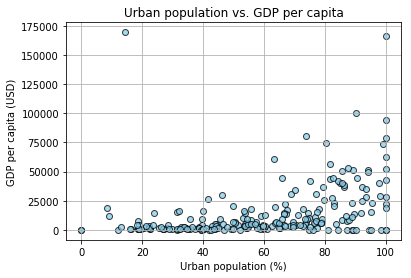

In [5]:
# Urban population vs. GDP per capita
plt.scatter(tech_data["Urban population (%)"],
            tech_data["GDP per capita (USD)"],
            facecolors = "skyblue",
            edgecolors = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.75)

plt.title("Urban population vs. GDP per capita")
plt.ylabel("GDP per capita (USD)")
plt.xlabel("Urban population (%)")
plt.grid(True)

plt.savefig("urban_population_vs_GDP_per_capita.png")

plt.show()

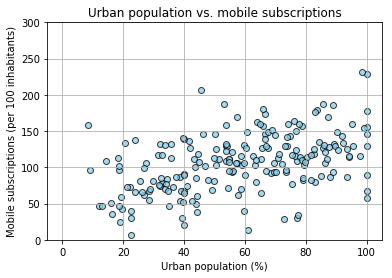

In [6]:
# Urban population vs. mobile subscriptions
plt.scatter(tech_data["Urban population (%)"],
            tech_data["Mobile subscriptions (per 100 inhabitants)"],
            facecolors = "skyblue",
            edgecolors = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.75)

plt.title("Urban population vs. mobile subscriptions")
plt.ylabel("Mobile subscriptions (per 100 inhabitants)")
plt.xlabel("Urban population (%)")
plt.ylim(0, 300)
plt.grid(True)

plt.savefig("urban_population_vs_mobile_subscriptions.png")

plt.show()

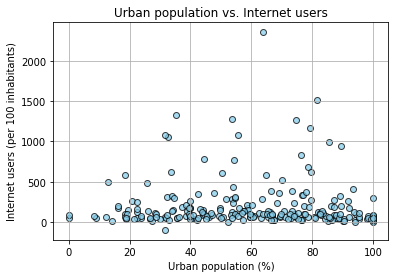

In [7]:
# Urban population vs. Internet users
plt.scatter(tech_data["Urban population (%)"],
            tech_data["Internet users (per 100 inhabitants)"],
            facecolors = "skyblue",
            edgecolors = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.75)

plt.title("Urban population vs. Internet users")
plt.ylabel("Internet users (per 100 inhabitants)")
plt.xlabel("Urban population (%)")
plt.grid(True)

plt.savefig("urban_population_vs_Internet_users.png")

plt.show()

In [8]:
# Identify the unique regions in the data
tech_data.Region.unique()

array(['SouthernAsia', 'SouthernEurope', 'NorthernAfrica', 'Polynesia',
       'MiddleAfrica', 'Caribbean', 'SouthAmerica', 'WesternAsia',
       'Oceania', 'WesternEurope', 'EasternEurope', 'CentralAmerica',
       'WesternAfrica', 'NorthernAmerica', 'SouthernAfrica',
       'South-easternAsia', 'EasternAfrica', 'NorthernEurope',
       'EasternAsia', 'Melanesia', 'Micronesia', 'CentralAsia'],
      dtype=object)

In [9]:
# Create a filtered data frame for each region
asia_tech_data = tech_data[tech_data["Region"].isin(["SouthernAsia", "WesternAsia", "South-easternAsia", "EasternAsia", "CentralAsia"])]
europe_tech_data = tech_data[tech_data["Region"].isin(["SouthernEurope", "WesternEurope", "EasternEurope", "NorthernEurope"])]
africa_tech_data = tech_data[tech_data["Region"].isin(["NorthernAfrica", "MiddleAfrica", "WesternAfrica", "SouthernAfrica", "EasternAfrica"])]
america_tech_data = tech_data[tech_data["Region"].isin(["SouthAmerica", "CentralAmerica", "NorthernAmerica"])]
other_tech_data = tech_data[tech_data["Region"].isin(["Polynesia", "Caribbean", "Oceania", "Melanesia", "Micronesia"])]

In [10]:
# Ask the user which region they would like to generate plots for
region = input("Which region would you like to generate plots for? [Asia, Europe, Africa, America, Other] ")

Which region would you like to generate plots for? [Asia, Europe, Africa, America, Other] n/a


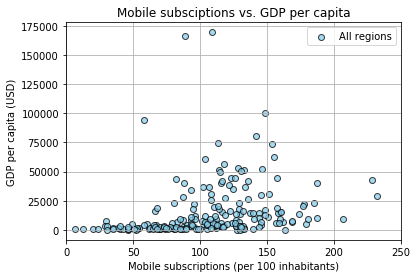

In [11]:
# Mobile subsciptions vs. GDP per capita

if(region.lower() == "asia"):
    
    plt.scatter(asia_tech_data["Mobile subscriptions (per 100 inhabitants)"],
                asia_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Asia")

elif(region.lower() == "europe"):
    
    plt.scatter(europe_tech_data["Mobile subscriptions (per 100 inhabitants)"],
                europe_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Europe")

elif(region.lower() == "africa"):    
    
    plt.scatter(africa_tech_data["Mobile subscriptions (per 100 inhabitants)"],
                africa_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Africa")

elif(region.lower() == "america"):     
    
    plt.scatter(america_tech_data["Mobile subscriptions (per 100 inhabitants)"],
                america_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "America")

elif(region.lower() == "other"):    
    
    plt.scatter(other_tech_data["Mobile subscriptions (per 100 inhabitants)"],
                other_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Other")

else:
    
    plt.scatter(tech_data["Mobile subscriptions (per 100 inhabitants)"],
                tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "All regions")    
    
plt.title("Mobile subsciptions vs. GDP per capita")
plt.ylabel("GDP per capita (USD)")
plt.xlabel("Mobile subscriptions (per 100 inhabitants)")
plt.xlim(0, 250)
plt.grid(True)
plt.legend()

plt.savefig("mobile_subscriptions_vs_GDP_per_capita.png")

plt.show()

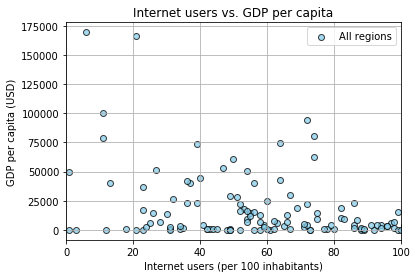

In [16]:
# Internet users vs. GDP per capita
if(region.lower() == "asia"):
    
    plt.scatter(asia_tech_data["Internet users (per 100 inhabitants)"],
                asia_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Asia")

elif(region.lower() == "europe"):
    
    plt.scatter(europe_tech_data["Internet users (per 100 inhabitants)"],
                europe_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Europe")

elif(region.lower() == "africa"):    
    
    plt.scatter(africa_tech_data["Internet users (per 100 inhabitants)"],
                africa_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Africa")

elif(region.lower() == "america"):     
    
    plt.scatter(america_tech_data["Internet users (per 100 inhabitants)"],
                america_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "America")

elif(region.lower() == "other"):    
    
    plt.scatter(other_tech_data["Internet users (per 100 inhabitants)"],
                other_tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "Other")

else:
    
    plt.scatter(tech_data["Internet users (per 100 inhabitants)"],
                tech_data["GDP per capita (USD)"],
                facecolors = "skyblue",
                edgecolors = "black",
                linewidths = 1,
                marker = "o",
                alpha = 0.75,
                label = "All regions")       
    
plt.title("Internet users vs. GDP per capita")
plt.ylabel("GDP per capita (USD)")
plt.xlabel("Internet users (per 100 inhabitants)")
plt.xlim(0, 100)
plt.grid(True)
plt.legend()

plt.savefig("Internet_users_vs_GDP_per_capita.png")

plt.show()